In [1]:
import pandas as pd
from src import *

# Read Data

In [2]:
predicted_returns = pd.read_pickle("data/pred_ret_Least Correlated 15.pkl")
predicted_returns

predicted_ret
           ticker               
2001-02-28 A           -0.089789
           AAPL        -0.074102
           ABT         -0.033381
           ADBE        -0.056268
           ADI          0.014105
...                          ...
2024-02-29 XYL          0.077408
           YUM          0.000280
           ZBH          0.036020
           ZBRA         0.035131
           ZTS          0.011332

[80783 rows x 1 columns]

In [3]:
price = pd.read_pickle("data/price.pkl")["adj_close"].unstack("ticker")
price = fill_price_dates(price, droplevel=False).ffill()
price.shape

(8822, 392)

# Find top / bottom decile for long / short position

In [4]:
start_date = datetime(2007, 1, 1)
position_indicator = calc_position_by_rank(
    df_price=price, 
    df_ratio=predicted_returns.loc[start_date:].unstack("ticker"),
    rank_formula="predicted_ret",
    lb=0,
    ub=0.1,
    interval=None,
    use_change=False,
)
position_indicator

ticker,A,AAL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,FOXA,DOW,AMCR,LHX,CTVA,TT,CARR,ABNB,UBER,CEG
2007-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-28,1,-1,0,0,0,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-03-31,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0,-1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-10-31,0,0,0,0,0,0,0,0,1,0,...,0,-1,0,0,-1,0,0,0,0,0
2023-11-30,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-31,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


# Example: Position to equal weighted

In [5]:
INIT_CAPITAL = 1e6
position = portfolio_equal_weighted(
    position_indicator=position_indicator,
    df_price=price,
    position_size=INIT_CAPITAL,
)
position

ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZTS
2007-01-31,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,546.145138,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2007-02-28,2016.079297,-845.369481,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1832.325895,...,2286.478953,-726.354833,0.000000,0.000000,0.00000,0.0,-2798.629744,-546.680567,0.000000,0.0
2007-03-31,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,-900.661615,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2007-04-30,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,-1145.477490,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2007-05-31,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,946.504499,0.00000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.000000,-2439.500390,182.991655,-213.760263,0.0,0.0,0.0,0.0,0.0,420.812445,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2023-10-31,0.000000,0.000000,183.463145,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0
2023-11-30,0.000000,0.000000,0.000000,221.562332,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,517.982510,0.000000,988.12371,0.0,0.000000,0.000000,-131.867668,0.0
2023-12-31,-224.771632,2274.381368,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,343.807625,-504.764981,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0


# Run backtest with All Position Change

<Axes: >

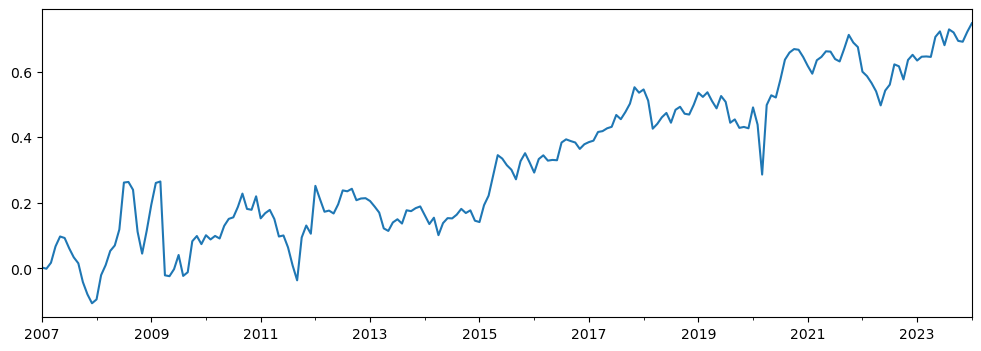

In [6]:
trade_cls = CalcTrade(
    df_price=price,
    init_cap=INIT_CAPITAL,
    adj_small_change=True
)
summary_df = trade_cls.iter_dates(position=position)
summary_df["total_ret"].plot(figsize=(12,4))

In [7]:
df_ff = get_ff_data()

pd.Series({
    **eval_return(summary_df["total_ret"], df_ff=df_ff, ann_factor=12),
    **ff_decomposition(summary_df["total_ret"], df_ff=df_ff, ann_factor=12)
}) 

return             0.747490
mean               0.003182
std                0.050321
skew              -0.744742
kurtosis           9.659202
sharpe             0.193659
sharpe_mkt         0.097018
sortino            0.239880
var               -0.188422
cvar              -0.382696
max_drawdown      -0.388952
downside_beta     -0.090725
alpha              3.488518
beta_Mkt-RF        1.343318
beta_SMB          -1.686874
beta_HML         -14.812726
beta_RF          871.835016
dtype: float64